In [104]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot

In [82]:
df = pd.read_csv('station_day.csv')

In [4]:
stations = ["DL"+str(i).zfill(3) for i in range(1,39)]

In [5]:
df = df[df['StationId'].isin(stations)]
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= dt.strptime('2018-11-11 00:00:00', "%Y-%m-%d 00:00:00")]

In [6]:
grouped = df.groupby('StationId')

In [7]:
remove = []
for st, group in grouped:
    if len(group) != 599:
        remove.append(st)
        continue

    clipped = group[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2']]
    missing = clipped.isna().sum(axis=0)
    if (missing >50).any():
        remove.append(st)
        continue
    print(st, min(group['Date']), max(group['Date']))
    print((missing))
    print()

DL001 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5    16
PM10     11
NO       12
NO2      11
NOx      11
SO2      13
dtype: int64

DL002 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5    30
PM10     36
NO       34
NO2      34
NOx      34
SO2      32
dtype: int64

DL003 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5    2
PM10     0
NO       0
NO2      0
NOx      0
SO2      2
dtype: int64

DL005 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5     7
PM10     37
NO        5
NO2       5
NOx       5
SO2      15
dtype: int64

DL008 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5     9
PM10      5
NO        7
NO2       6
NOx       5
SO2      11
dtype: int64

DL009 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
SO2      2
dtype: int64

DL010 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5    0
PM10     6
NO       0
NO2      0
NOx      0
SO2      0
dtype: int64

DL014 2018-11-11 00:00:00 2020-07-01 00:00:00
PM2.5     5
PM10     19
NO       13
NO2      13


In [15]:
delhi_df = df[~df['StationId'].isin(remove)]
delhi_df = df[['StationId','Date','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2']]

In [16]:
delhi_df.to_csv('delhi_stations.csv', index=False)

In [84]:
delhi_df = pd.read_csv('delhi_stations.csv')
delhi_df.set_index('Date', inplace = True)
delhi_df.index = pd.to_datetime(delhi_df.index)

In [85]:
delhi_df.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,SO2
Date,,,,,,,
2018-11-11,DL001,232.36,415.28,1.72,79.86,43.87,23.48
2018-11-12,DL001,238.43,348.91,3.25,78.95,44.63,14.38
2018-11-13,DL001,284.83,427.40,19.98,112.54,76.15,21.33
2018-11-14,DL001,150.41,214.16,6.35,96.17,56.30,12.74
2018-11-15,DL001,106.11,154.36,7.36,77.52,47.21,12.46


In [86]:
delhi_df = delhi_df.interpolate(method = 'time')

In [87]:
index = delhi_df['PM10'].index[delhi_df['PM10'].apply(np.isnan)]

In [88]:
delhi_df['PM10'][index].unique()

array([], dtype=float64)

In [89]:
delhi_df['PM10'][index]

Series([], Name: PM10, dtype: float64)

In [98]:
grouped = delhi_df.groupby('StationId')

North = ['DL003', 'DL015', 'DL028', 'DL038']
South = ['DL016', 'DL024', 'DL026', 'DL031', 'DL034', 'DL036']
West = ['DL010', 'DL020', 'DL022']
East = ['DL02', 'DL027', 'DL037']

In [100]:
station1 = delhi_df[delhi_df['StationId'] == 'DL003']

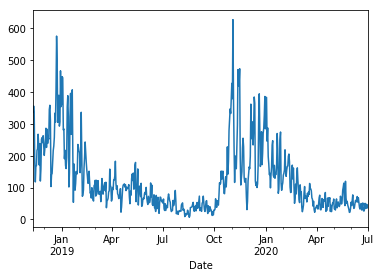

In [105]:
station1['PM2.5'].plot()

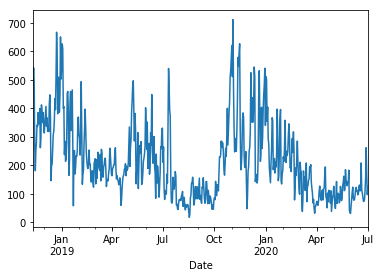

In [106]:
station1['PM10'].plot()

In [116]:
North_df = delhi_df[delhi_df['StationId'].isin(North)]
South_df = delhi_df[delhi_df['StationId'].isin(South)]
West_df = delhi_df[delhi_df['StationId'].isin(West)]
East_df = delhi_df[delhi_df['StationId'].isin(East)]

In [112]:
North_df.to_csv('North.csv', index=False)

Date
2018-11-11    False
2018-11-12    False
2018-11-13    False
2018-11-14    False
2018-11-15    False
              ...  
2020-06-27     True
2020-06-28     True
2020-06-29     True
2020-06-30     True
2020-07-01     True
Name: StationId, Length: 22580, dtype: bool

In [108]:
North_df = delhi_df[delhi_df['StationId'] in North]
for st, group in grouped:
    if st in North:
        print(st)

#     clipped = group[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2']]
#     missing = clipped.isna().sum(axis=0)
#     if (missing >50).any():
#         remove.append(st)
#         continue
#     print(st, min(group['Date']), max(group['Date']))
#     print((missing))
#     print()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().